In [1]:
import torch
from data_loader import get_caltech101_loaders

train_loader, val_loader, test_loader = get_caltech101_loaders()

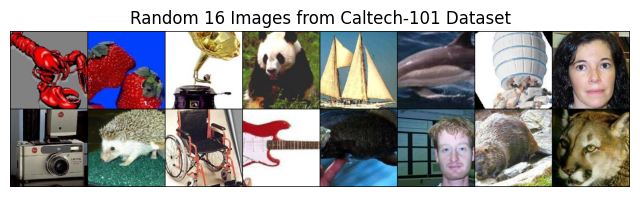

In [5]:
import matplotlib.pyplot as plt
import torchvision
from torchvision.utils import make_grid
import numpy as np
from data_loader import get_caltech101_loaders

# 获取数据加载器
train_loader, _, _ = get_caltech101_loaders()

# 获取一批数据
images, labels = next(iter(train_loader))

# 选取前16张
images = images[:16]
labels = labels[:16]

# 将图像从归一化还原（从 [-1, 1] 回到 [0, 1]）
def unnormalize(img):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    return img * std + mean

images = unnormalize(images)

# 创建图像网格
grid_img = make_grid(images, nrow=8)
np_img = grid_img.permute(1, 2, 0).numpy()

# 显示图像
plt.figure(figsize=(8, 8))
plt.imshow(np.clip(np_img, 0, 1))
plt.axis('off')
plt.title("Random 16 Images from Caltech-101 Dataset")
plt.show()
